# Interfaces

## pyLHE

In [1]:
with open('example.lhe', 'r') as file:
    for line in file:
        print(line, end='')

<LesHouchesEvents version="3.0">
<init>
     2212     2212  2.51000E+03  2.51000E+03     -1     -1     -1     -1     -4      1
  4.37712E+06  1.47821E+04  1.00000E+00  10001
</init>
<event>
      6  10001  1.68713E+07  8.94427E-01 -1.00000E+00  6.65838E-01
       2    -1     0     0   501     0  0.000000000E+00  0.000000000E+00  1.749324861E+02  1.749324861E+02  0.000000000E+00  0.00000E+00  9.000E+00
      21    -1     0     0   502   501  0.000000000E+00  0.000000000E+00 -1.592747830E-03  1.592747830E-03  0.000000000E+00  0.00000E+00  9.000E+00
      23     2     1     2     0     0 -2.408277128E-01  1.052626414E-01  1.565325189E+02  1.565338272E+02  5.835294129E-01  0.00000E+00  9.000E+00
      11     1     3     3     0     0  7.521133062E-02  1.659522570E-01  1.774845055E+01  1.774938573E+01  5.110000000E-04  0.00000E+00  9.000E+00
     -11     1     3     3     0     0 -3.160390434E-01 -6.068961564E-02  1.387840684E+02  1.387844415E+02  5.110000000E-04  0.00000E+00  9.000E+00
   

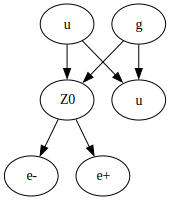

In [2]:
import pylhe
events = pylhe.read_lhe("example.lhe")
next(events)

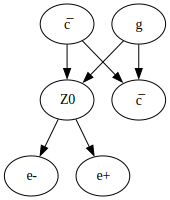

In [3]:
next(events)

WARNING. Parse Error: junk after document element: line 27, column 1


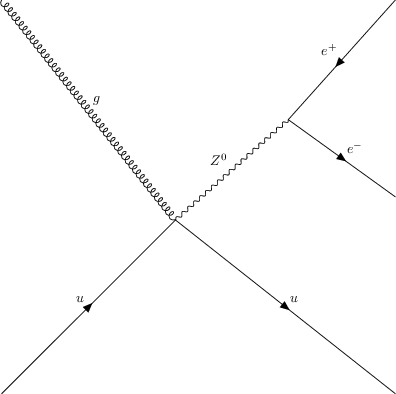

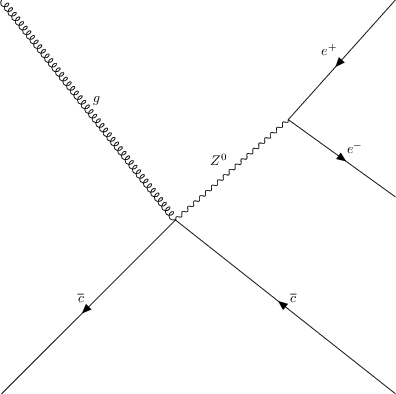

In [4]:
from feynml.interface.lhe import lhe_to_feynml
fml = lhe_to_feynml("example.lhe")
fml

## pyHEPMC

In [5]:
import pyhepmc
with pyhepmc.open("example.HepMC") as f:
    for event in f:
        e=event
e

<GenEvent momentum_unit=1, length_unit=0, event_number=0, particles=819, vertices=477, run_info=GenRunInfo(tools=[], weight_names=['Default', 'W1', 'W2'], attributes={})>

In [8]:
from feynml.interface.hepmc import hepmc_event_to_feynman

from pyfeyn2.render.latex.tikzfeynman import TikzFeynmanRender
from pyfeyn2.render.pyx.pyxrender import PyxRender
from pyfeyn2.feynmandiagram import FeynML

from pyfeyn2.auto.bend import auto_bend
from pyfeyn2.auto.label import auto_label
from pyfeyn2.auto.position import feynman_adjust_points,remove_unnecessary_vertices

fd = hepmc_event_to_feynman(event)
fd.legs[0].with_xy(7,-7).with_external(r"$\textcolor{green}{p}$").style.color = "green"
fd.legs[1].with_xy(-6,6).with_external(r"$\textcolor{green}{p}$").style.color = "green"

props=[]
for prop in fd.propagators:
    if prop.id in ["Propagator" + str(ii) for ii in [
        187,
        188,
        189, 192,
        190, 361, 505, 592, 647, 648,
        191, 362, 506, 593]]:
        prop.style.color="red"
        props += [prop]
        
for p in props:
    fd.remove_propagator(p)
fd.propagators += props 

for prop in fd.legs:
    if prop.id in ["Leg" + str(ii) for ii in [
        187,
        188,
        189, 192,
        190, 361, 505, 592, 647, 648,
        191, 362, 506, 593]]:
        prop.style.color="blue"
        if prop.pdgid == 22:
            prop.with_xy(0,6).with_external(r"$\textcolor{blue}{\gamma}$")




d = remove_unnecessary_vertices(fd)
d = feynman_adjust_points(d,size=15)
auto_bend(d)
auto_label(d.propagators)
auto_label(d.legs)
#print(d)
t = TikzFeynmanRender(d)
#print(t.get_src())
#t.src_diag

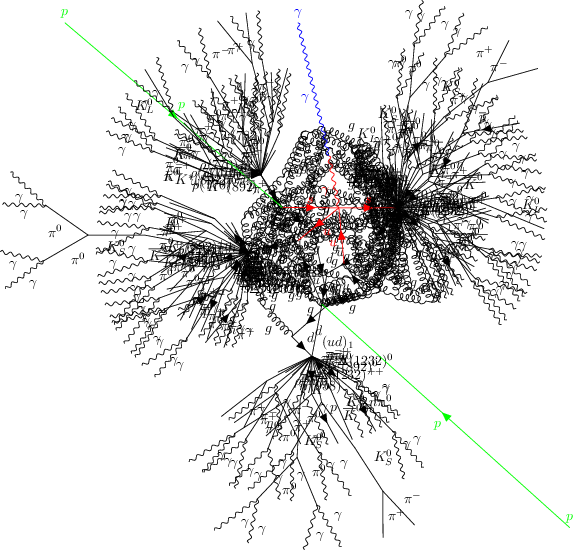

In [9]:
t.render(show=True);

## ufo_draw 

is a program that uses pyfeyn2, feynml, qgraf, feynmodel to draw Feynman diagrams from UFO models. Primarily as commandline tool.

In [10]:
from ufo_draw.ufo_diagrams import generate_diagrams


	Please cite the following papers if you use this code:

      [1] Automatic Feynman graph generation J. Comput. Phys. 105 (1993) 279--289 https://doi.org/10.1006/jcph.1993.1074

      [2] Abusing Qgraf Nucl. Instrum. Methods Phys. Res. A 559 (2006) 220--223 https://doi.org/10.1016/j.nima.2005.11.151

      [3] Feynman graph generation and propagator mixing, I Comput. Phys. Commun. 269 (2021) 108103 https://doi.org/10.1016/j.cpc.2021.108103

	


25


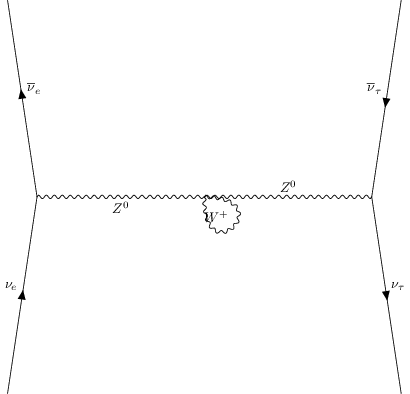

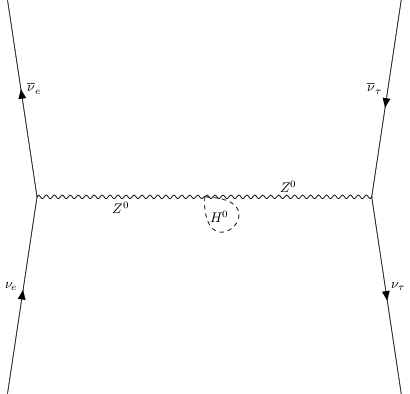

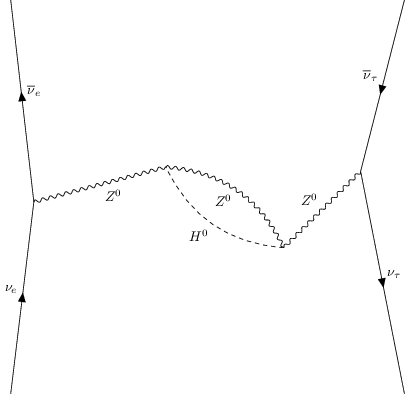

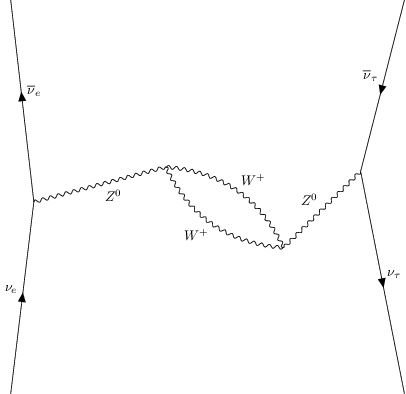

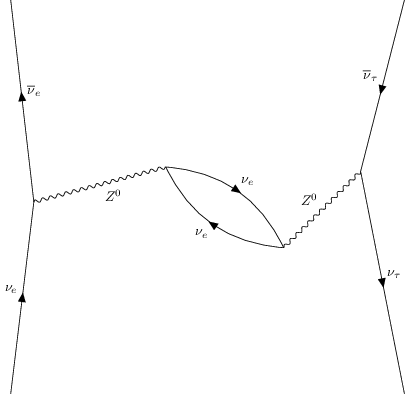

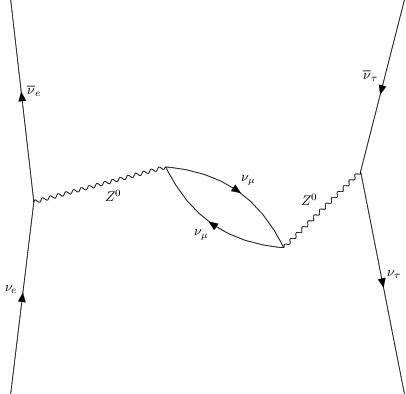

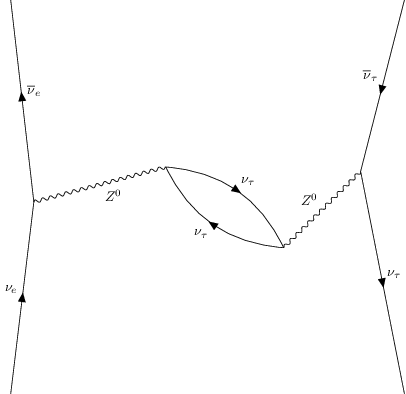

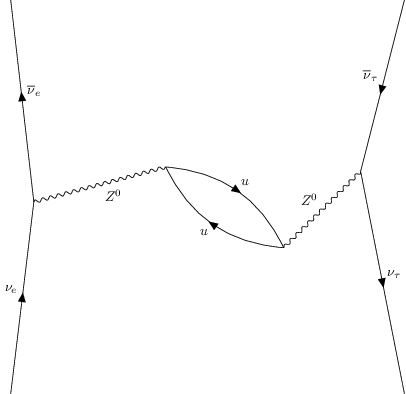

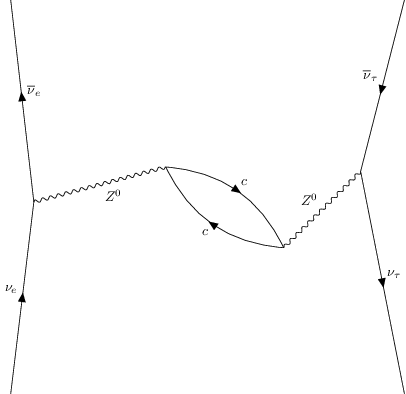

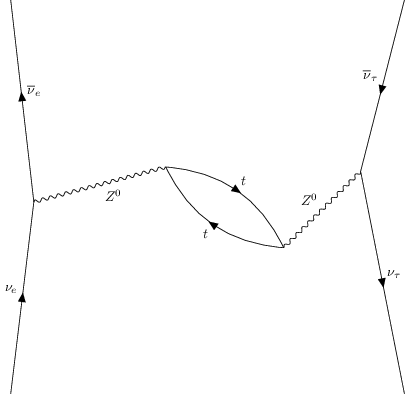

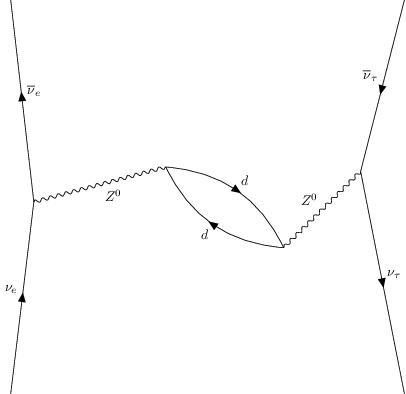

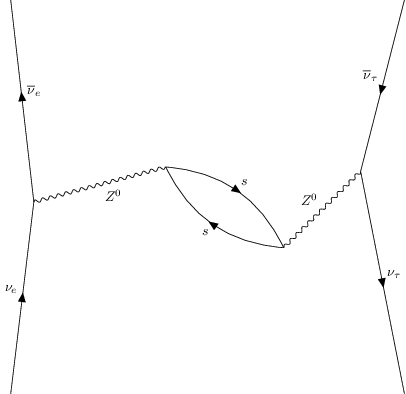

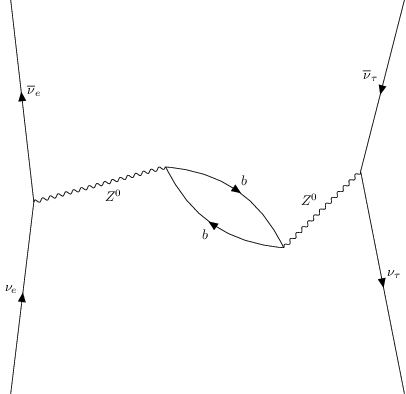

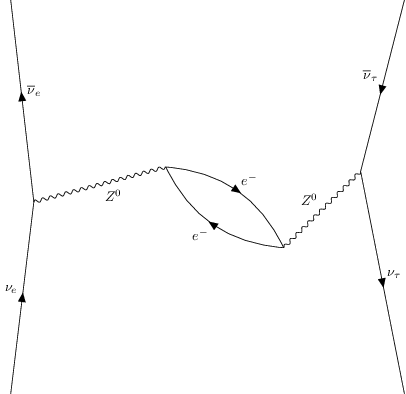

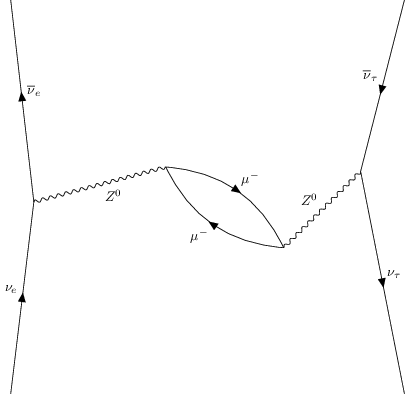

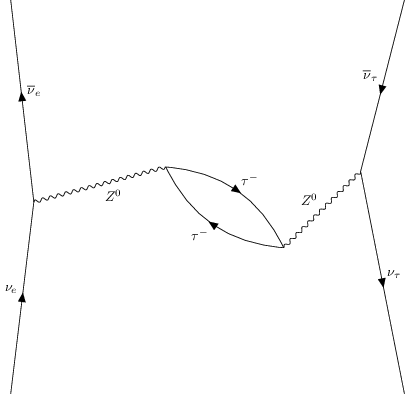

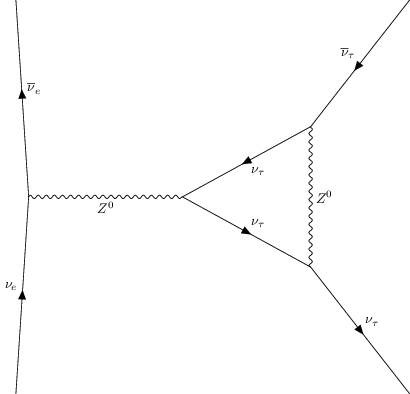

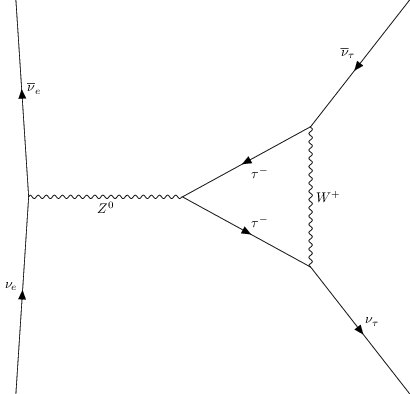

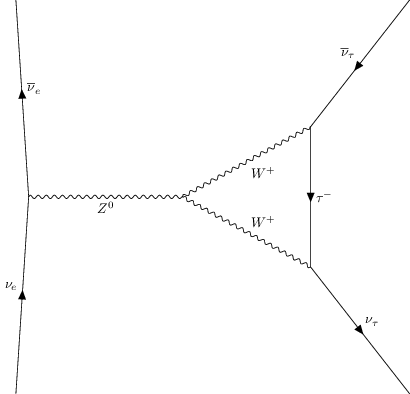

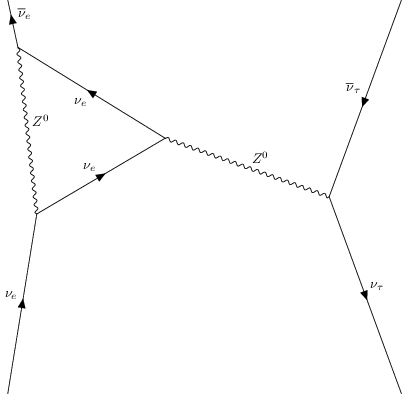

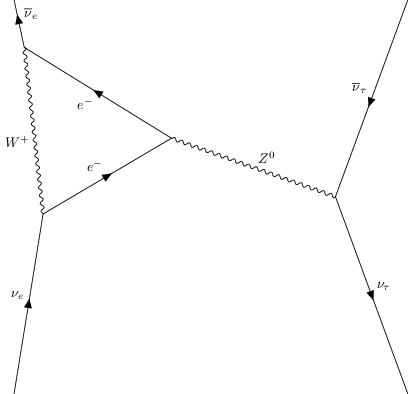

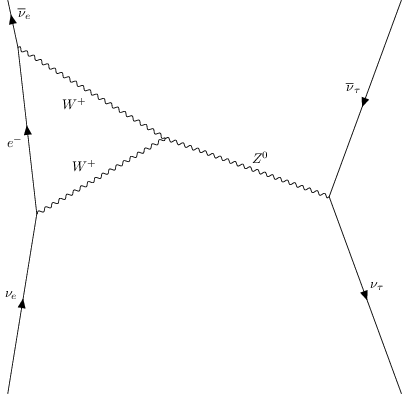

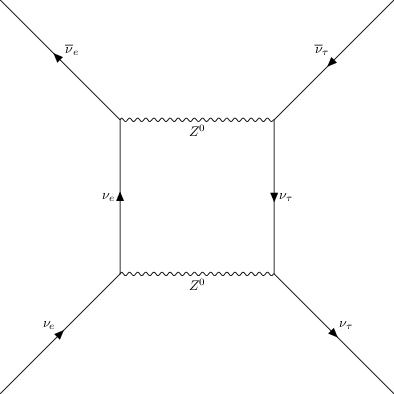

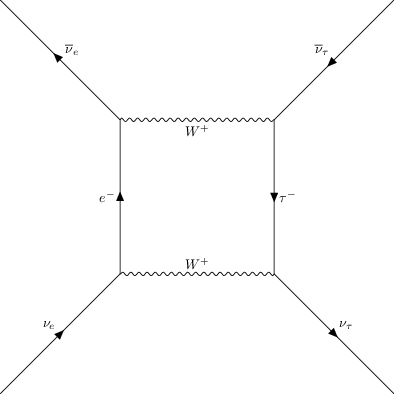

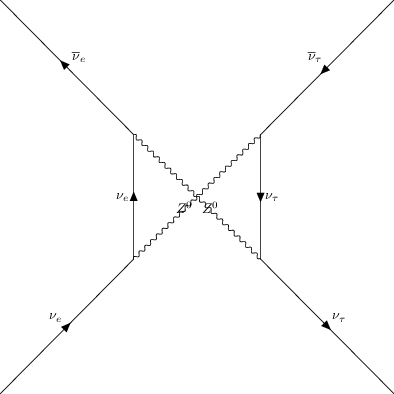

In [11]:
fml = generate_diagrams("ufo_sm",["nu_e","nu_e_bar"],["nu_tau","nu_tau_bar"],loops=1,filter=["G0","G+","gh","G-"])
print(len(fml.diagrams))
fml